## Data Understanding, Data Cleaning & Feature Engineering

To get a better overview of the data, I will first look at each dataframe.  

Afterward, I will directly starting cleaning the data and engineer new features which can be used in the data visualization and modelling step in the susequent sections.

#### Load libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("..")
from source.utils import save_data

C:\Users\Till\AppData\Local\Temp\ipykernel_616\2060124466.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# load data
df_portfolio = pd.read_json('../data/portfolio.json', lines=True)
df_profile = pd.read_json('../data/profile.json', lines=True)
df_transcript = pd.read_json('../data/transcript.json', lines=True)

### Portfolio Dataset

**Description**  
containing offer ids and meta data about each offer (duration, type, etc.)

**Schema**  
id (string) - offer id  
offer_type (string) - type of offer ie BOGO (buy one get one free), discount, informational  
difficulty (int) - minimum required spend to complete an offer  
reward (int) - reward given for completing an offer  
duration (int) - time for offer to be open, in days  
channels (list of strings)

In [3]:
df_portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


Let's create dummy variables for channels.

In [4]:
df_exploded = df_portfolio.explode('channels')
channel_df = pd.get_dummies(df_exploded['channels']).groupby(level=0).sum()
df_portfolio = pd.concat([df_portfolio.copy(), channel_df], axis=1)
df_portfolio.drop('channels', axis=1, inplace=True)

df_portfolio.head()

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


Let's rename the columns. When we merge datasets later, it's easier to differentiate the columns.

In [5]:
df_portfolio.rename(columns={'id': 'offer_id', 'duration': 'offer_duration', 'difficulty': 'offer_difficulty', 'channels': 'offer_channels', 'reward': 'offer_reward'}, inplace=True)
df_portfolio

,offer_reward,offer_difficulty,offer_duration,offer_type,offer_id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


In [6]:
df_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   offer_reward      10 non-null     int64 
 1   offer_difficulty  10 non-null     int64 
 2   offer_duration    10 non-null     int64 
 3   offer_type        10 non-null     object
 4   offer_id          10 non-null     object
 5   email             10 non-null     int64 
 6   mobile            10 non-null     int64 
 7   social            10 non-null     int64 
 8   web               10 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 800.0+ bytes


In [7]:
df_portfolio.describe()

,offer_reward,offer_difficulty,offer_duration,email,mobile,social,web
count,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000,1.0,0.900000,0.600000,0.800000
std,3.583915,5.831905,2.321398,0.0,0.316228,0.516398,0.421637
min,0.000000,0.000000,3.000000,1.0,0.000000,0.000000,0.000000
25%,2.000000,5.000000,5.000000,1.0,1.000000,0.000000,1.000000
50%,4.000000,8.500000,7.000000,1.0,1.000000,1.000000,1.000000
75%,5.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000
max,10.000000,20.000000,10.000000,1.0,1.000000,1.000000,1.000000


In [8]:
df_portfolio['offer_type'].value_counts()

offer_type
bogo             4
discount         4
informational    2
Name: count, dtype: int64

#### Save cleaned portfolio data to pickle

In [9]:
save_data(df_portfolio, '../data/portfolio_cleaned.pkl')

### Profile Dataset

**Description**  
demographic data for each customer

**Schema**   
age (int) - age of the customer  
became_member_on (int) - date when customer created an app account  
gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)  
id (str) - customer id  
income (float) - customer's income  

In [10]:
df_profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


Let's rename the columns. When we merge datasets later, it's easier to differentiate the columns.

In [11]:
df_profile.rename(columns={'id': 'user_id'}, inplace=True)
df_profile.head(3)

,gender,age,user_id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN


In [12]:
df_profile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   user_id           17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 796.9+ KB


Looking at the data types, we can see that became_member_on is type int, but it would be useful to have it as type datetime.  
Let's change that first.

In [13]:
# Transform became_member_on to dtype datetime
df_profile['became_member_on'] = pd.to_datetime(df_profile['became_member_on'], format='%Y%m%d')

Let's add a new column member_days that shows for how many days a member is registered.  
I will assume that the most recent day in the column is the day of the last registration.

In [14]:
# Add column member_days and drop became_member_on
df_profile['member_days'] = df_profile['became_member_on'].apply(lambda x: (df_profile['became_member_on'].max() - x).days)
df_profile.drop('became_member_on', axis=1, inplace=True)

Let's add another feature that shows how many offers each user received. This requires information from the transcript dataset.

In [15]:
offers_received = df_transcript[df_transcript['event'] == 'offer received'].groupby(['person'])['event'].count().reset_index()
df_profile = pd.merge(df_profile, offers_received, how='inner', left_on='user_id', right_on='person')
df_profile.drop('person', axis=1, inplace=True)
df_profile.rename(columns={'event': 'offers_received'}, inplace=True)

df_profile.head()

,gender,age,user_id,income,member_days,offers_received
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,NaN,529,5
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,376,2
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,NaN,14,2
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,443,4
4,None,118,a03223e636434f42ac4c3df47e8bac43,NaN,356,5


Let's explore the cleaned dataset:

In [16]:
df_profile.describe()

,age,income,member_days,offers_received
count,16994.000000,14820.000000,16994.000000,16994.000000
mean,62.526656,65406.882591,517.441685,4.488467
std,26.738768,21598.059614,411.266228,1.073047
min,18.000000,30000.000000,0.000000,1.000000
25%,45.000000,49000.000000,208.000000,4.000000
50%,58.000000,64000.000000,358.000000,5.000000
75%,73.000000,80000.000000,791.000000,5.000000
max,118.000000,120000.000000,1823.000000,6.000000


<Axes: xlabel='gender'>

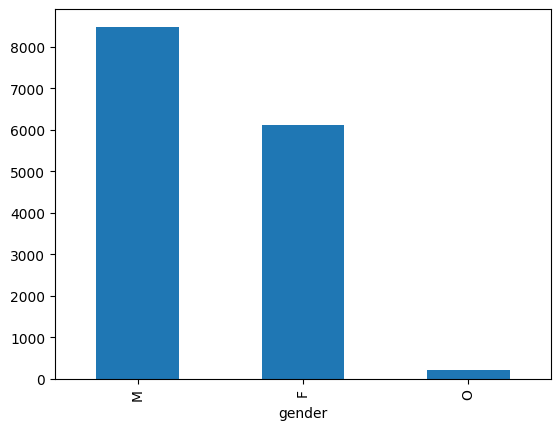

In [17]:
df_profile['gender'].value_counts().plot(kind='bar')

(array([1308., 1438., 2054., 3381., 3256., 2030.,  966.,  360.,   27.,
        2174.]),
 array([ 18.,  28.,  38.,  48.,  58.,  68.,  78.,  88.,  98., 108., 118.]),
 <BarContainer object of 10 artists>)

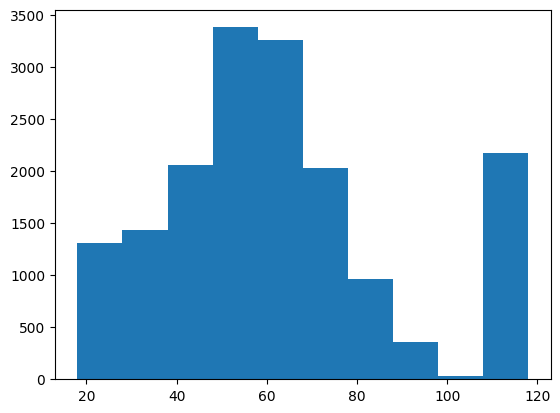

In [18]:
plt.hist(df_profile['age'])

#### Checking users with age over 100 years

Turns out that there are 5 people at age 101 years old which seems valid.  
But there are also 2175 persons with age 118 which doesn't seem correct. Nobody of these users declared their gender nor income. Thus, I don't see any value in keeping these and assume it's better to drop these instances from the dataset. 

In [19]:
# check values over 100 years. Doesn't seem right
df_profile_age100 = df_profile[df_profile['age'] > 100]
print(df_profile_age100.describe())
print('\nGender values:', df_profile_age100['gender'].value_counts())

               age        income  member_days  offers_received
count  2179.000000      5.000000  2179.000000      2179.000000
mean    117.960991  67800.000000   483.246443         4.497017
std       0.813591  22398.660674   350.262140         1.083038
min     101.000000  43000.000000     0.000000         1.000000
25%     118.000000  56000.000000   212.000000         4.000000
50%     118.000000  59000.000000   360.000000         5.000000
75%     118.000000  82000.000000   751.500000         5.000000
max     118.000000  99000.000000  1819.000000         6.000000

Gender values: gender
F    5
Name: count, dtype: int64


In [20]:
df_profile.drop(df_profile[df_profile['age'] == 118].index, inplace=True)

In [21]:
df_profile.head()

,gender,age,user_id,income,member_days,offers_received
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,376,2
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,443,4
5,M,68,e2127556f4f64592b11af22de27a7932,70000.0,91,4
8,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,167,6
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,257,3


In [22]:
df_profile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14820 entries, 1 to 16993
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           14820 non-null  object 
 1   age              14820 non-null  int64  
 2   user_id          14820 non-null  object 
 3   income           14820 non-null  float64
 4   member_days      14820 non-null  int64  
 5   offers_received  14820 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 810.5+ KB


Now the data is cleaned, let's have a look at it!

<Axes: xlabel='income', ylabel='Count'>

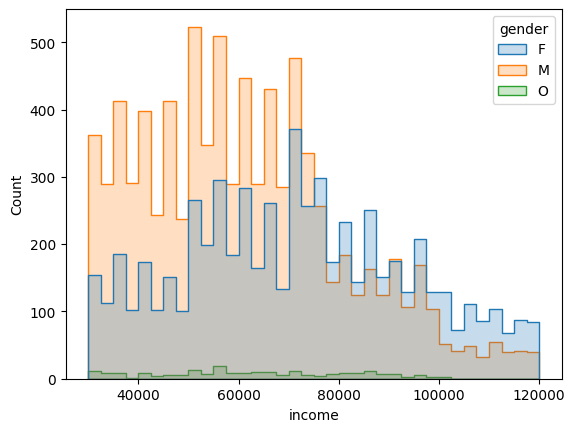

In [23]:
sns.histplot(data=df_profile, x='income', hue='gender', element="step")

<Axes: xlabel='age', ylabel='Count'>

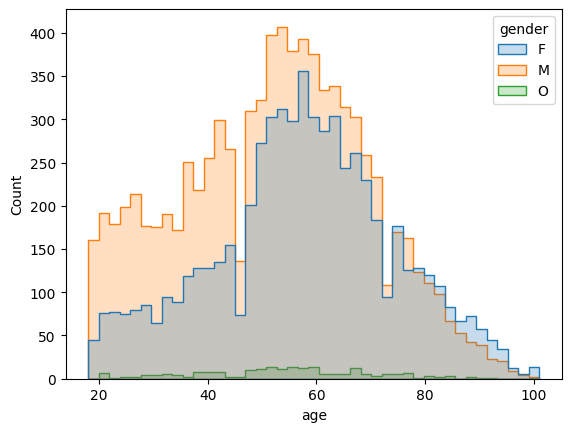

In [24]:
sns.histplot(data=df_profile, x='age', hue='gender', element="step")

<Axes: xlabel='member_days', ylabel='Count'>

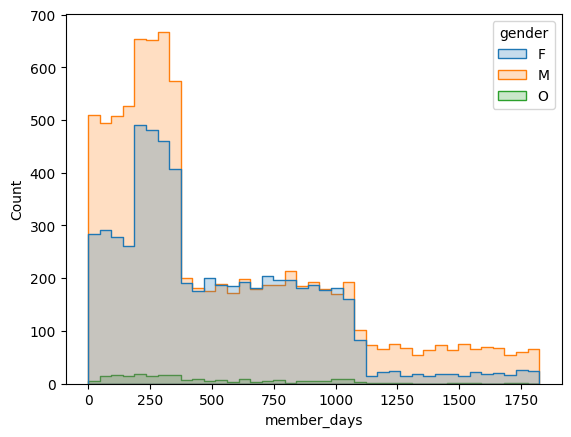

In [25]:
sns.histplot(data=df_profile, x='member_days', hue='gender', element="step")

<Axes: xlabel='offers_received', ylabel='Count'>

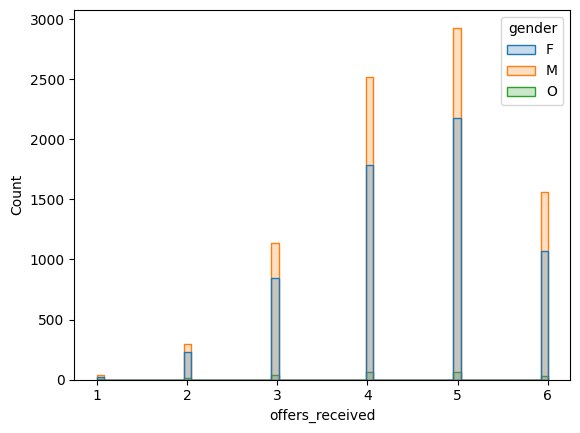

In [26]:
sns.histplot(data=df_profile, x='offers_received', hue='gender', element="step")

#### Save cleaned profile data to pickle

In [27]:
save_data(df_profile, '../data/profile_cleaned.pkl')

### Transcript Dataset

**Description**  
records for transactions, offers received, offers viewed, and offers completed

**Schema**  
event (str) - record description (ie transaction, offer received, offer viewed, etc.)  
person (str) - customer id  
time (int) - time in hours since start of test. The data begins at time t=0  
value - (dict of strings) - either an offer id or transaction amount depending on the record

In [28]:
df_transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


Looking at the dataframe, column 'value' looks strange. Cell values are in dictionary format.  
Let's extract these values by creating new columns for the dictionary keys with their respective values.

In [29]:
# extract dict values from value column
df_transcript = pd.concat([df_transcript, df_transcript['value'].apply(pd.Series)], axis=1)
df_transcript.head(3)

,person,event,value,time,offer id,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN


Seems like there are two offer id columns now. Let's fix that by adding them together. And we drop the value column since we extracted its values.

In [30]:
# Add together offer id and offer_id
df_transcript['offer_id'] = np.where(df_transcript['offer id'].isnull() & df_transcript['offer_id'].notnull(), df_transcript['offer_id'],df_transcript['offer id'])

# drop offer id and value columns
df_transcript.drop(['offer id', 'value'], axis=1, inplace=True)

Let's rename the columns. When we merge datasets later, it's easier to differentiate the columns.

In [31]:
df_transcript.rename(columns={'person': 'user_id', 'event': 'status', 'time': 'test_time', 'amount': 'amount_spent', 'reward': 'reward_received'}, inplace=True)
df_transcript.head()

,user_id,status,test_time,amount_spent,offer_id,reward_received
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


As another step, let's transform the time column from hours to days as duration in the portfolio dataset is in days as well.

In [32]:
# transform time from hours to days
df_transcript['test_time'] = round(df_transcript['test_time'] / 24, 2)

Let's have a look at the resulting dataframe:

In [33]:
df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306534 entries, 0 to 306533
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          306534 non-null  object 
 1   status           306534 non-null  object 
 2   test_time        306534 non-null  float64
 3   amount_spent     138953 non-null  float64
 4   offer_id         167581 non-null  object 
 5   reward_received  33579 non-null   float64
dtypes: float64(3), object(3)
memory usage: 16.4+ MB


In [34]:
df_transcript.describe()

,test_time,amount_spent,reward_received
count,306534.000000,138953.000000,33579.000000
mean,15.265956,12.777356,4.904137
std,8.346930,30.250529,2.886647
min,0.000000,0.050000,2.000000
25%,7.750000,2.780000,2.000000
50%,17.000000,8.890000,5.000000
75%,22.000000,18.070000,5.000000
max,29.750000,1062.280000,10.000000


(array([35540., 13961., 35789., 17345., 32589., 42039., 24307., 43552.,
        44593., 16819.]),
 array([ 0.   ,  2.975,  5.95 ,  8.925, 11.9  , 14.875, 17.85 , 20.825,
        23.8  , 26.775, 29.75 ]),
 <BarContainer object of 10 artists>)

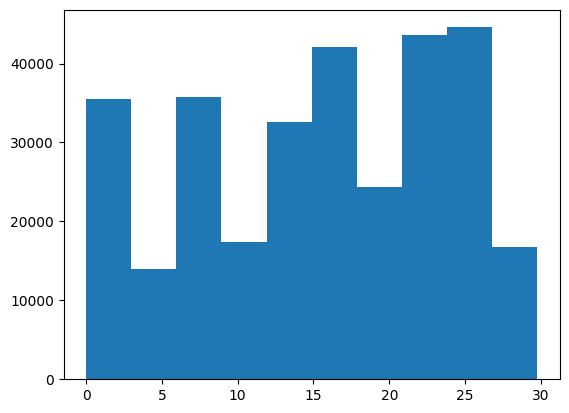

In [35]:
plt.hist(df_transcript['test_time'])

(array([52296., 21474., 19254., 17697., 13303.,  8066.,  3889.,  1576.,
          533.,   159.]),
 array([ 0.05 ,  5.039, 10.028, 15.017, 20.006, 24.995, 29.984, 34.973,
        39.962, 44.951, 49.94 ]),
 <BarContainer object of 10 artists>)

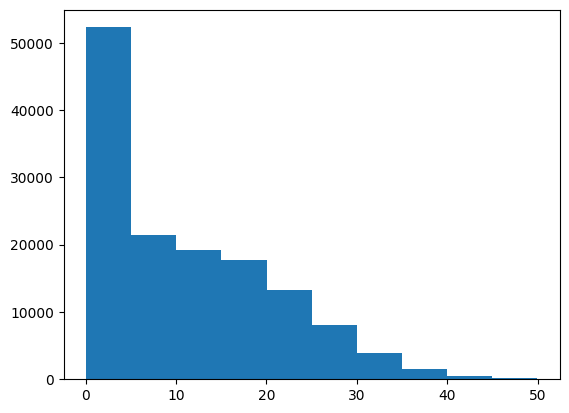

In [36]:
plt.hist(df_transcript[df_transcript['amount_spent'] < 50]['amount_spent'])

In [37]:
df_transcript['reward_received'].value_counts()

reward_received
5.0     12070
2.0      9334
10.0     7019
3.0      5156
Name: count, dtype: int64

#### Save cleaned transcript data to pickle

In [38]:
save_data(df_transcript, '../data/transcript_cleaned.pkl')